In [11]:
#Install required packages
! pip install -q 'gwosc==0.5.4'
! pip install pycbc
! pip install gwpy


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


Set 1, Challenge 1; Identifying a loud binary black hole signal in white Gaussian noise 

1. Load the data into memory. What are the sampling rate and duration of the data?
2. Plot the data in the time-domain.
3. Plot a spectrogram (or q-transform) of the data, and try to identify the signal.
4. What is the time of the merger?

In [12]:
import gwpy
from gwpy.timeseries import TimeSeries

In [13]:
data = TimeSeries.read('challenge1.gwf', channel="H1:CHALLENGE1")
print(data)

TimeSeries([ 1.09389188e-21,  1.21228706e-22,  1.64565889e-24,
            ..., -4.43135131e-23, -2.34576855e-22,
             4.51019899e-22]
           unit: ct,
           t0: -64.0 s,
           dt: 0.000244140625 s,
           name: H1:CHALLENGE1,
           channel: None)


In [14]:
sample_rate = data.sample_rate.value
duration = data.duration.value
print(f"Sample Rate: {sample_rate}")
print(f"Duration: {duration}")

Sample Rate: 4096.0
Duration: 128.0


1: From this we find the sample rate to be 4096s and the duration to be 128s

2: A plot of the data in the time domain:

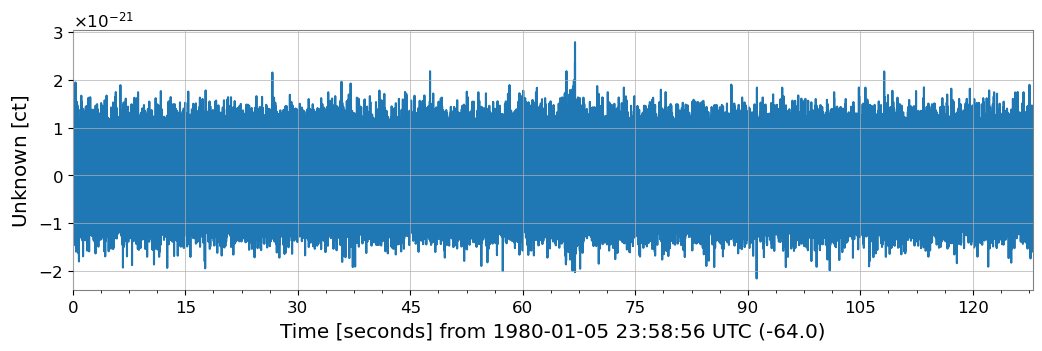

In [15]:
#creating plot of raw data
%matplotlib inline
plot = data.plot()

3: A plot of the result from the q-test

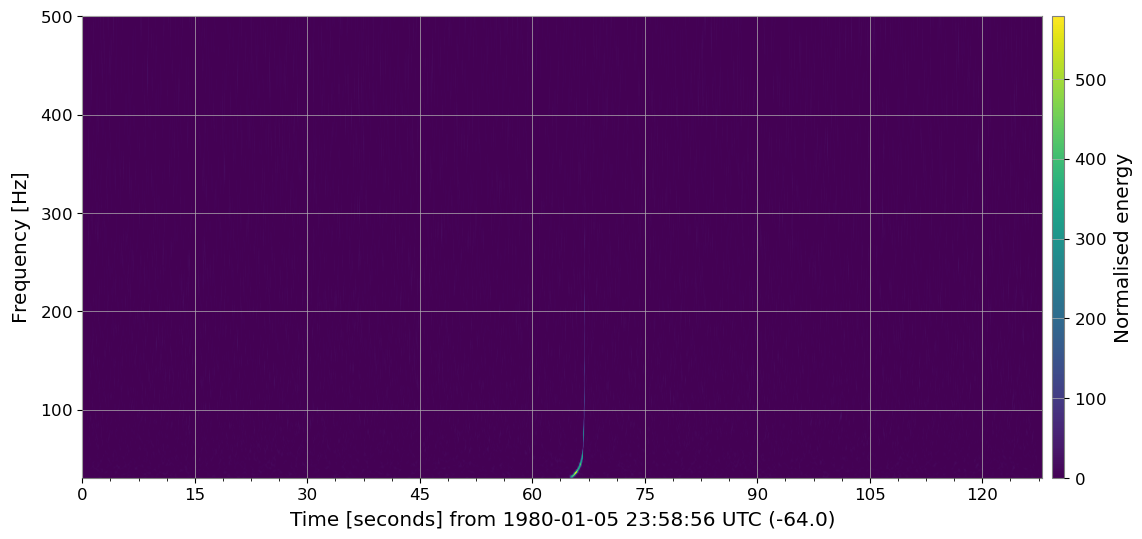

In [16]:
#performing q test to identify signal 
hq = data.q_transform(frange=(30, 500))
plot = hq.plot()
plot.colorbar(label="Normalised energy")

time of merger = 2.98 s after 1980-01-06 00:00:00 UTC


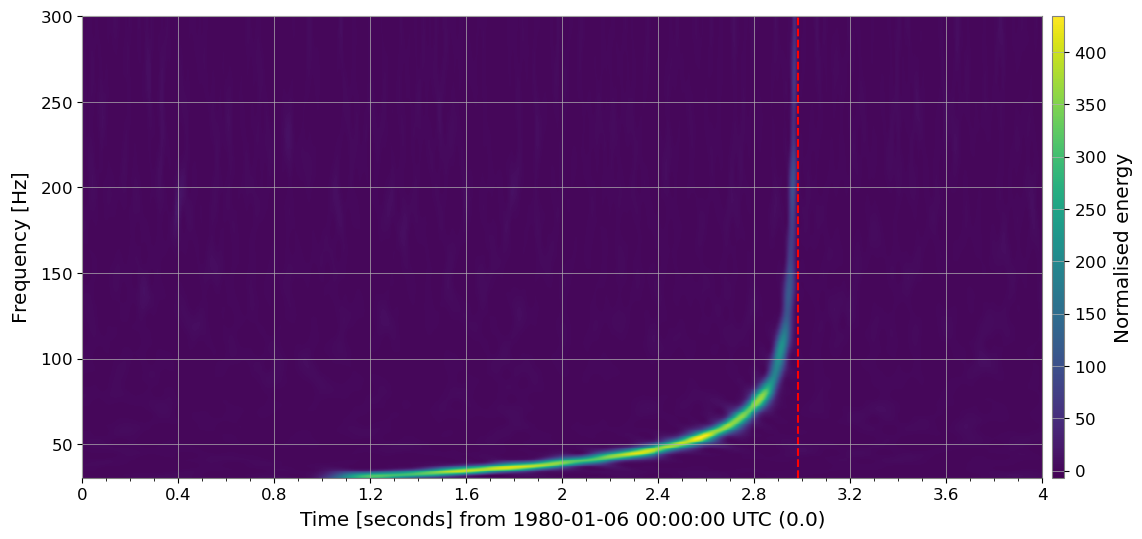

In [17]:
#transform q test plot to enhance on signal and create custom dotted line to show the signal 
print('time of merger = 2.98 s after 1980-01-06 00:00:00 UTC')
import matplotlib.pyplot as plt #matplotlib is imported for the purpose of creating the -- line

hq = data.q_transform(frange=(30, 300), outseg=(0,4), qrange=(10,30))
plot = hq.plot()
plt.axvline(x=2.98, color='r', linestyle='--')
plot.colorbar(label="Normalised energy")
plt.show()



4: From this plot we find that the time of the merger was at 2.98 seconds after 1980-01-06 00:00:00 UTC

Set 1, Challenge 2: Signal in colored Gaussian noise 
1. What is the approximative time of the merger? (Hint: a plot of the q-transform
could help)
2. Generate a time-domain template waveform using approximate
"SEOBNRv4_opt". with the same parameters as above. Plot this waveform.
3. Calculate a PSD of the data, and plot this on a log-log scale. Use axes ranging
from 20 Hz up to the Nyquist frequency.
4. Use the template waveform and PSD to calculate the SNR time series. Plot the
SNR time-series.
5. What is the matched filter SNR of the signal?

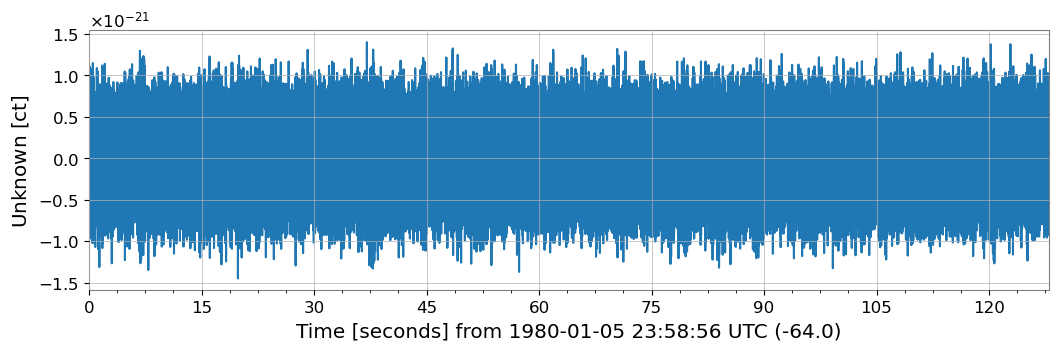

In [18]:
#creating plot of raw data 
data_2 = TimeSeries.read('challenge2.gwf', channel="H1:CHALLENGE2")
%matplotlib inline
plot = data_2.plot()

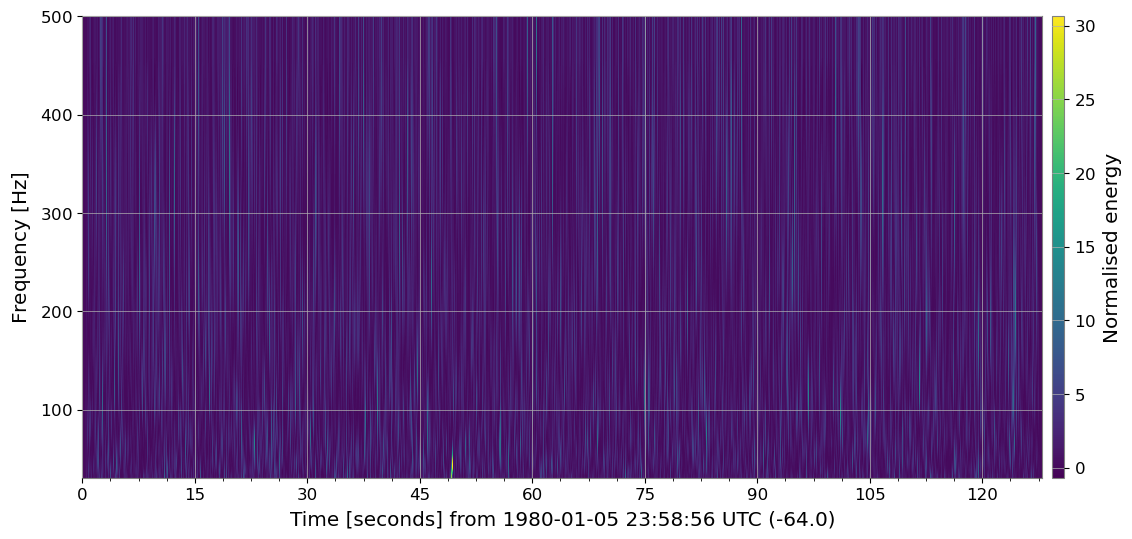

In [19]:
#performing q test to approximate time of merger
hq = data_2.q_transform(frange=(30, 500))
plot = hq.plot()
plot.colorbar(label="Normalised energy")

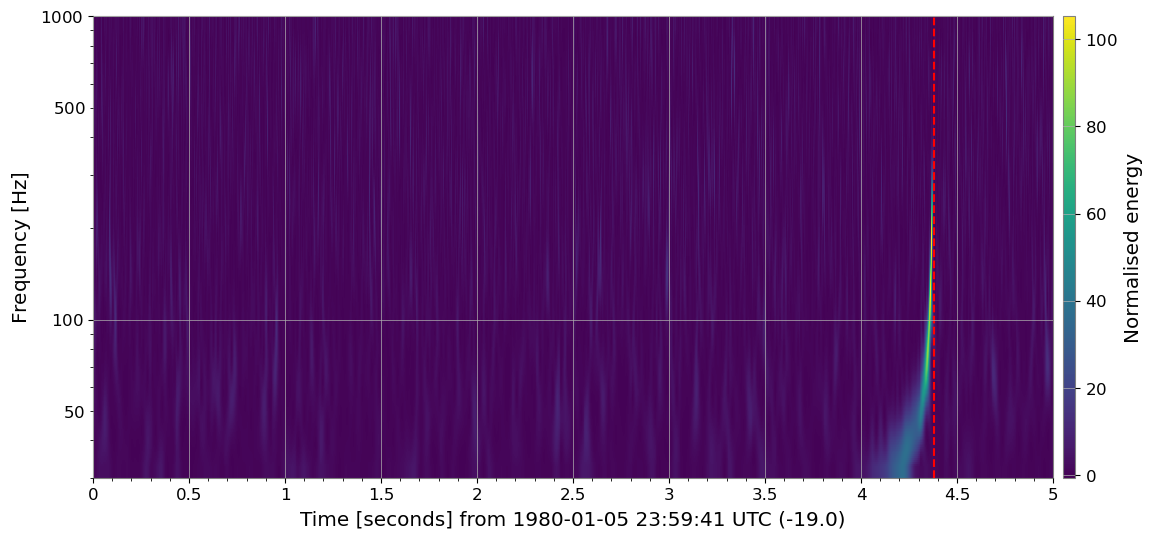

time of merger approx 4.38sec after 1980-01-05 23:59:41 UTC


In [20]:
import matplotlib.pyplot as plt #matplotlib is imported to create -- line
hq = data_2.q_transform(frange=(30, 1000), outseg=(45-64,50-64))
plot = hq.plot()
ax = plot.gca()
ax.set_ylim(30, 1000)
ax.set_yscale("log")
plt.axvline(x=-14.62, color='r', linestyle='--')
plot.colorbar(label="Normalised energy")
plt.show()
print("time of merger approx 4.38sec after 1980-01-05 23:59:41 UTC")

1: From this we find the time of merger to be approx 4.38sec after 1980-01-05 23:59:41 UTC

In [21]:
from pycbc.waveform import get_td_waveform
import pylab

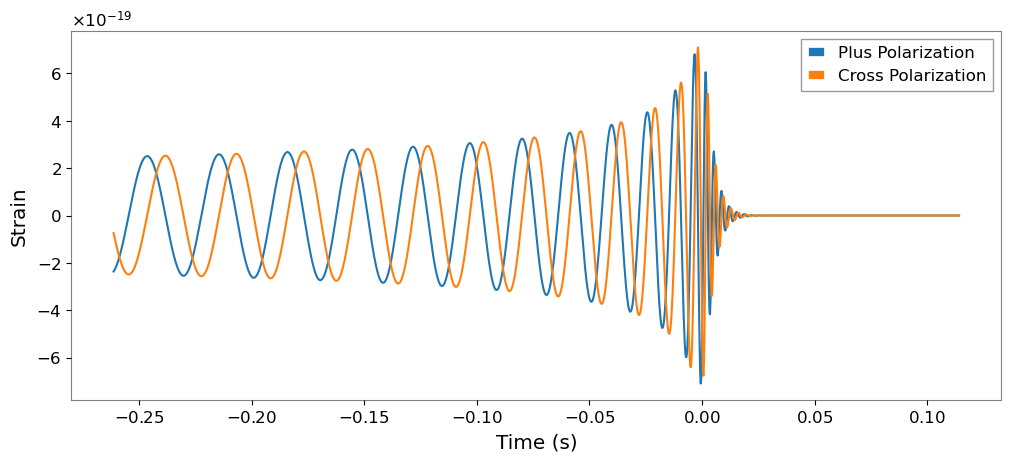

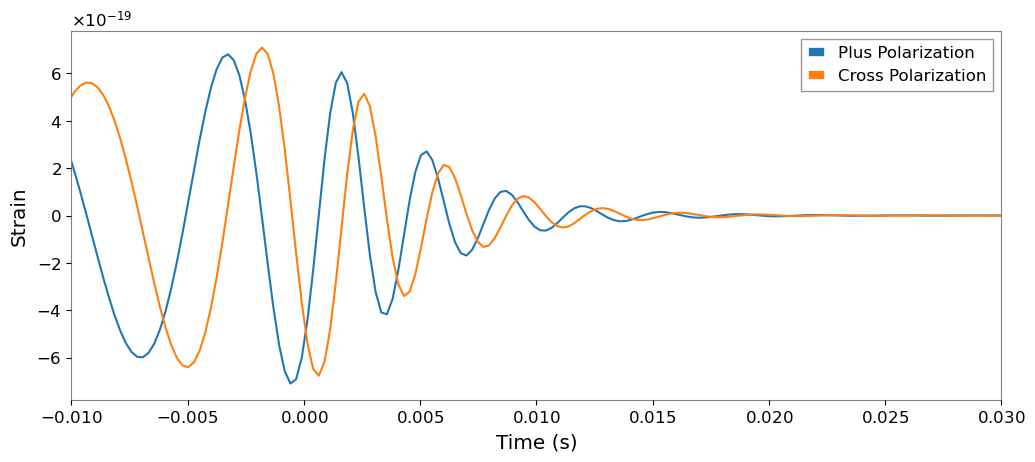

In [22]:
#Generating time-domain template waveform approximate "SEOBNRv4_opt"
#m1=m2=30 solar masses, spin = 0
sample_rate = data_2.sample_rate.value
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=30,
                         mass2=30,
                         delta_t=1.0/sample_rate,
                         f_lower=30)

pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.legend()
pylab.grid()
pylab.show()

# Zoom in near the merger time
pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.xlim(-0.01, 0.03)
pylab.legend()
pylab.grid()
pylab.show()

2: The plotted waveforms can be seen above

Text(0, 0.5, 'Power Spectral Density')

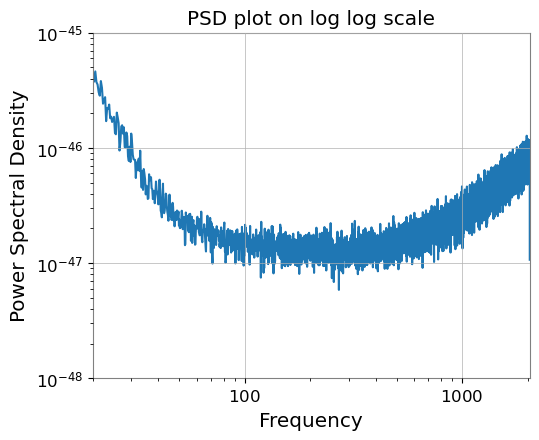

In [23]:
#Creating psd and plotting it on log log scale
psd=data_2.psd(fftlength=4,overlap=2, method='median')
plot=psd.plot(yscale='log', xscale='log', xlim= (20,2048), ylim=(1e-48,1e-45))
pylab.title("PSD plot on log log scale")
pylab.xlabel("Frequency")
pylab.ylabel("Power Spectral Density")


3: PSD log log plot can be seen above

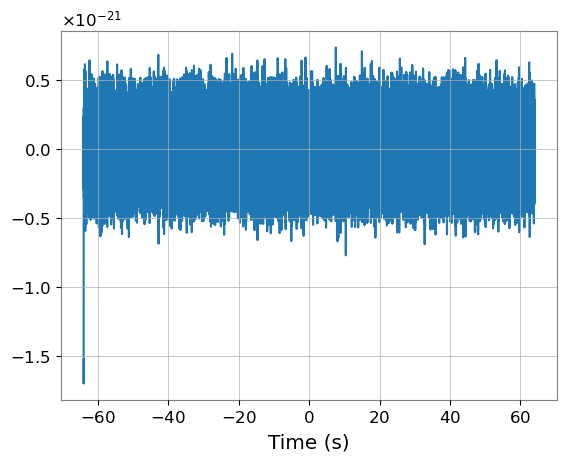

In [24]:
%matplotlib inline
from pycbc.filter import resample_to_delta_t, highpass
from pycbc import frame
strain = frame.read_frame('challenge2.gwf', 'H1:CHALLENGE2')

#removing the low frequency content and downsample the data to 2048Hz
strain = highpass(strain, 15.0)
strain = resample_to_delta_t(strain, 1.0/2048)

pylab.plot(strain.sample_times, strain)
pylab.xlabel('Time (s)')
pylab.show()

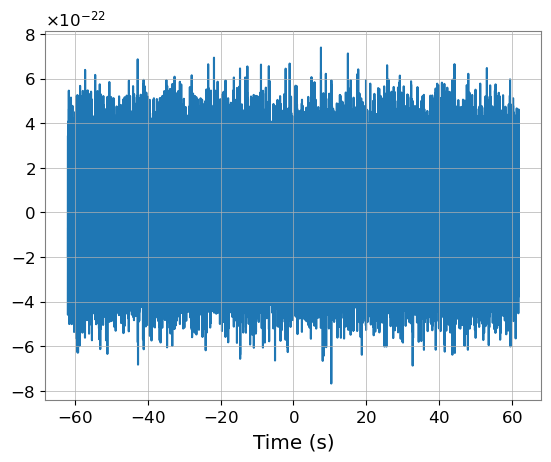

In [25]:
# Remove 2 seconds of data from both the beginning and end
conditioned = strain.crop(2, 2)

pylab.plot(conditioned.sample_times, conditioned)
pylab.xlabel('Time (s)')
pylab.show()

In [26]:
from pycbc.waveform import get_td_waveform


hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                     mass1=30,
                     mass2=30,
                     delta_t=conditioned.delta_t,
                     f_lower=20)

# Resize the vector to match our data
hp.resize(len(conditioned))

Text(0, 0.5, 'Strain')

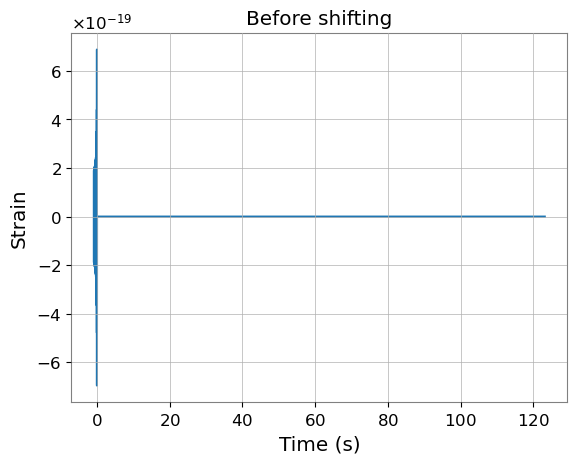

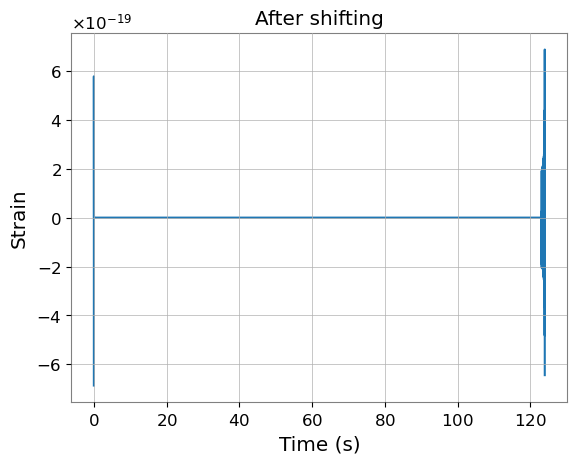

In [27]:
#signal plot before and after shifting

pylab.figure()
pylab.title('Before shifting')
pylab.plot(hp.sample_times, hp)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')

template = hp.cyclic_time_shift(hp.start_time)

pylab.figure()
pylab.title('After shifting')
pylab.plot(template.sample_times, template)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')

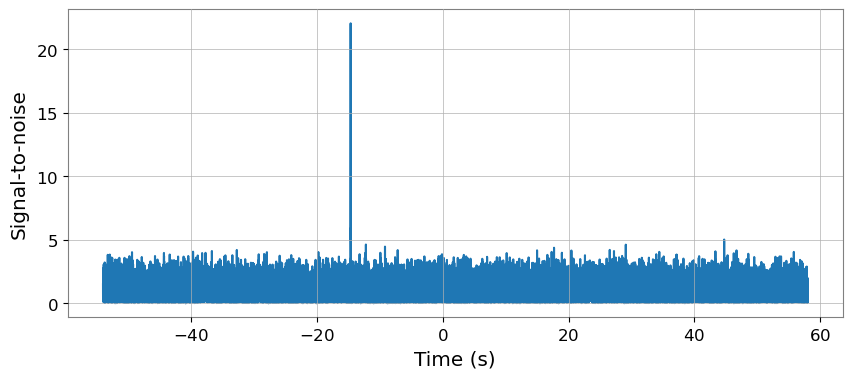

We found a signal at -14.6328125s with SNR 22.054545591712564


In [33]:
from pycbc.filter import matched_filter
import numpy

snr = matched_filter(template, conditioned,
                     psd=psd, low_frequency_cutoff=20)

#remove time corruption by the template and psd filter
#removing 8 seonds from the beginning and 4s seconds from end end
#the 4 exrta seconds are to account for the template length
snr = snr.crop(4 + 4, 4)

#creating plot
pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()

#finding time and snr-value
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("We found a signal at {}s with SNR {}".format(time, abs(snrp)))

4: Plot of the SNR time series can be seen above 

5: From this a signal was found at -14.6328125s with SNR 22.054545591712564

Set 2, Challenge 2: 
Plot the noise power spectral
density (PSD) of that data. 
Test whether there is any gravitational wave signal present in the data or not? 
For this test, you can assume the GW signals can produce only from equal mass binary systems with a range 
between 5 to 10. 
We assume a threshold on matched filter SNR of 8 to claim detection of GW.
• Whiten the above data using its noise PSD. You can use PyCBC based function of the
Welch method to estimate the PSD. Construct a histogram of the whitened data and
show that the whiten data follows a Gaussian distribution with zero mean.
• In gravitational wave data analysis, we consider that the noise is stationary Gaussian.
But in reality, the stationary assumption does not hold. Can you think of a test to
show that the stationarity does not hold?

In [34]:
from pycbc.waveform import get_td_waveform
import pylab
import pycbc
import numpy as np

Text(0, 0.5, 'Strain')

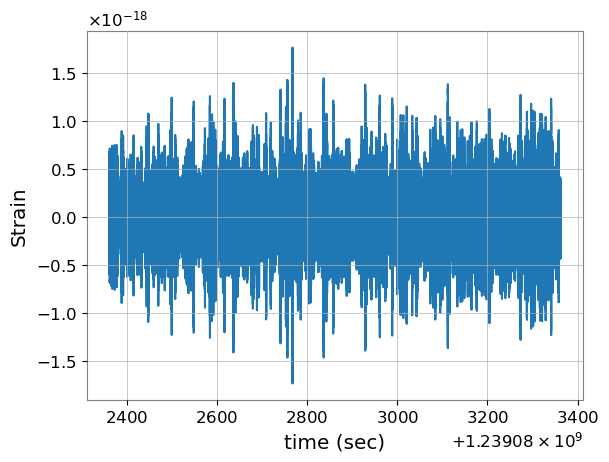

In [35]:
data_3 = np.load('noise_ts_4096Hz.npy')

time = data_3[:, 0]
data_3 = pycbc.types.TimeSeries(data_3[:, 1], delta_t = time[1]-time[0])
plt.plot(time, data_3) #plot data
plt.xlabel('time (sec)')
plt.ylabel('Strain')


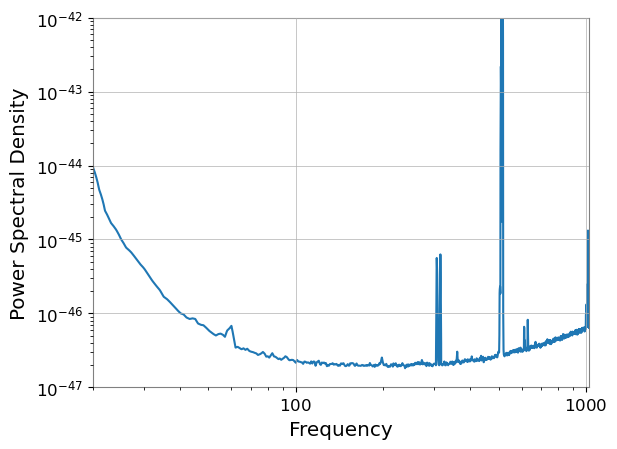

In [36]:
from pycbc.psd import welch, interpolate, inverse_spectrum_truncation
import pylab

psd = interpolate(welch(data_3), 1.0 / data_3.duration)

#create plot,labels and set axis limits
pylab.loglog(psd.sample_frequencies, psd)
pylab.xlabel("Frequency")
pylab.ylabel("Power Spectral Density")
pylab.xlim(20, 1024)
pylab.ylim(1e-47, 1e-42)
pylab.show()

Text(0.5, 1.0, 'Whitened Data histogram')

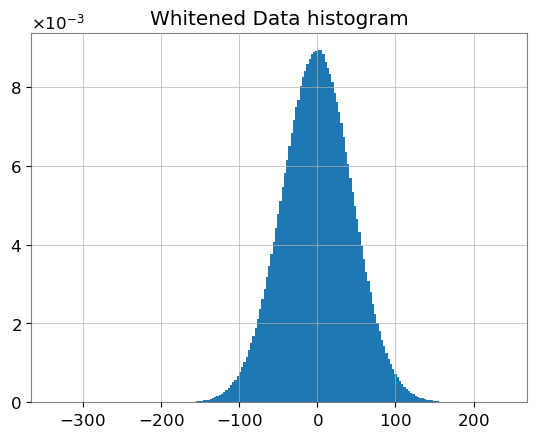

In [37]:
whitened_data = (data_3.to_frequencyseries() / psd**0.5).to_timeseries()
whitened_data = whitened_data.crop(4,4)

#create histogram
hist, bins, _ = plt.hist(whitened_data, bins=200, density=True)
plt.title("Whitened Data histogram")

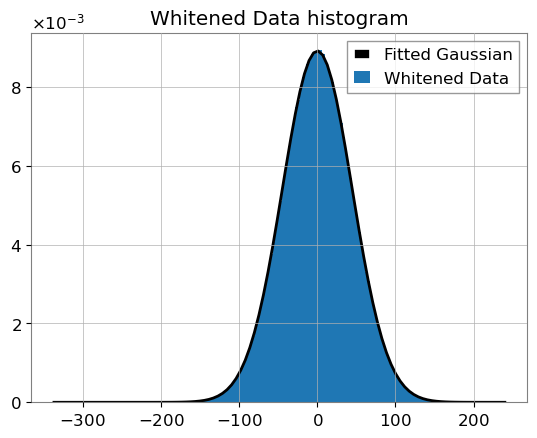

Mean of whitened data: 3.765201613809264e-24
Mean of fitted Gaussian: 0.0014166022882672329
Standard deviation of fitted Gaussian: 44.72975447257916


In [39]:
from scipy.stats import norm
hist, bins, _ = plt.hist(whitened_data, bins=200, density=True)
plt.title("Whitened Data histogram")

#Gaussian disribution:
param = norm.fit(whitened_data)
mu, std = param
gaussian_distribution = norm(mu, std)
mean = np.mean(data_3)


x = np.linspace(min(whitened_data), max(whitened_data), 100) #use linspace to generate gaussian curve
plt.plot(x, gaussian_distribution.pdf(x), 'k', linewidth=2)
plt.legend(['Fitted Gaussian', 'Whitened Data'])
plt.show()


print("Mean of whitened data:", mean)
print("Mean of fitted Gaussian:", mu)
print("Standard deviation of fitted Gaussian:", std)

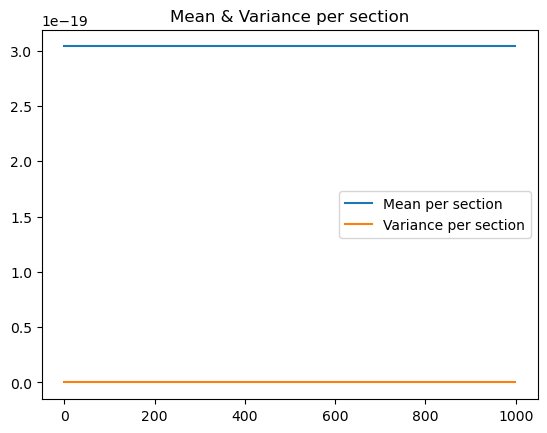

In [58]:
data_section = len(data_3) // 1000
mean_list = [] 
variance_list = []


# Loop through each section
for i in range(0,1000):
    mean = np.mean(section_data)
    variance = np.var(section_data)
    
    # Append the mean and variance to the respective lists
    mean_list.append(mean)
    variance_list.append(variance)

plt.plot(mean_list)
plt.plot(variance_list)
plt.legend(['Mean per section', 'Variance per section'])
plt.title('Mean & Variance per section')
plt.show()
